<h1>Book_reviews - отзывы о книгах</h1>

In [1]:
import numpy as np
from sklearn.datasets import load_files

In [2]:
book_reviews_train=load_files("book_reviews/train/")
text_train, y_train=book_reviews_train.data, book_reviews_train.target

In [3]:
text_train=[doc.replace(b"<br /", b" ") for doc in text_train]

In [4]:
book_reviews_test = load_files("book_reviews/test/")
text_test, y_test = book_reviews_test.data, book_reviews_test.target
text_test = [doc.replace(b"<br /", b" ") for doc in text_test]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Применение стоп-слов к "мешку слов"(смотреть в файле book_reviews)
stop_words_path="book_reviews/stop_words.txt"
with open(stop_words_path, "r") as file:
    stop_words = file.read().splitlines()
vect=CountVectorizer(max_features=10000, max_df=.15, stop_words=stop_words)
X=vect.fit_transform(text_train)

#Маштабирование данных с использованием TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

In [6]:
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_tfidf, y_train)

# Вывод коэффициентов модели
coefficients = model.coef_[0]
feature_names = vect.get_feature_names_out()

# Вывод топ-10 положительных и топ-10 отрицательных коэффициентов
print("Top 10 Positive Coefficients:")
print(sorted(zip(coefficients, feature_names), reverse=True)[:10])

print("\nTop 10 Negative Coefficients:")
print(sorted(zip(coefficients, feature_names), reverse=False)[:10])

Top 10 Positive Coefficients:
[(0.1637310529196023, 'thought'), (0.1637310529196023, 'thinking'), (0.1637310529196023, 'themes'), (0.1637310529196023, 'stop'), (0.1637310529196023, 'provoking'), (0.1637310529196023, 'powerful'), (0.15158549974989108, 'turner'), (0.15158549974989108, 'throughout'), (0.15158549974989108, 'thoughtfully'), (0.15158549974989108, 'suspense')]

Top 10 Negative Coefficients:
[(-0.17935838209627653, 'elements'), (-0.17935838209627653, 'engaging'), (-0.17935838209627653, 'expected'), (-0.17935838209627653, 'finish'), (-0.17935838209627653, 'lacked'), (-0.17935838209627653, 'much'), (-0.17935838209627653, 'mundane'), (-0.17935838209627653, 'struggle'), (-0.17935838209627653, 'turned'), (-0.17935838209627653, 'uninspiring')]


In [7]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics = lda.fit_transform(X)

In [8]:
lda.components_.shape

(10, 71)

In [9]:
sorting=np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names=np.array(vect.get_feature_names_out())

In [10]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
together      provoking     whole         provoking     confusing     
read          stop          seemed        stop          make          
stayed        powerful      dimensional   powerful      sense         
author        thought       experience    thought       quickly       
long          thinking      one           thinking      promising     
skillfully    themes        reading       themes        start         
weaved        expected      ruined        expected      led           
heartwarming  uninspiring   actions       uninspiring   convoluted    
finished      much          unrealistic   much          turner        
uplifting     mundane       thought       mundane       page          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
prov

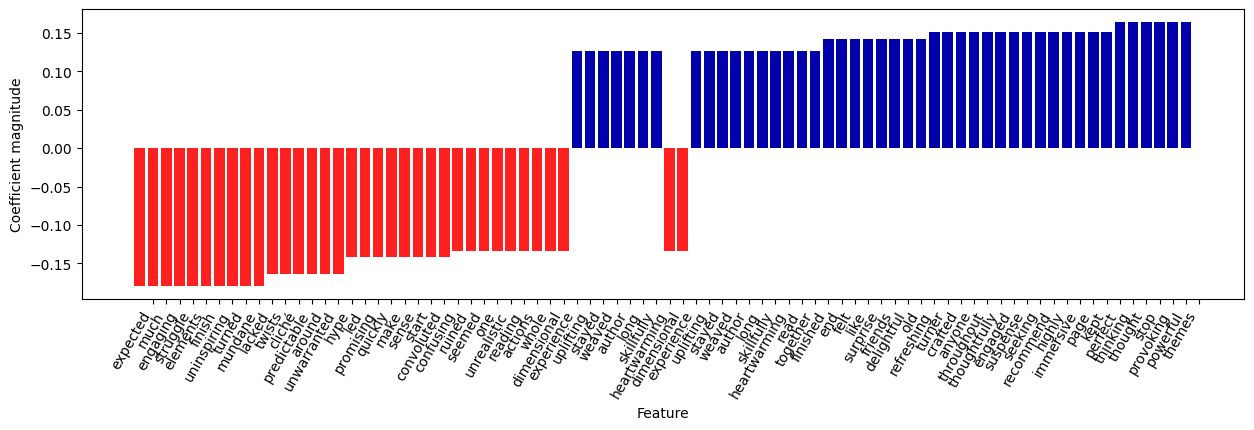

In [12]:
mglearn.tools.visualize_coefficients(coefficients, feature_names=feature_names, n_top_features=40)

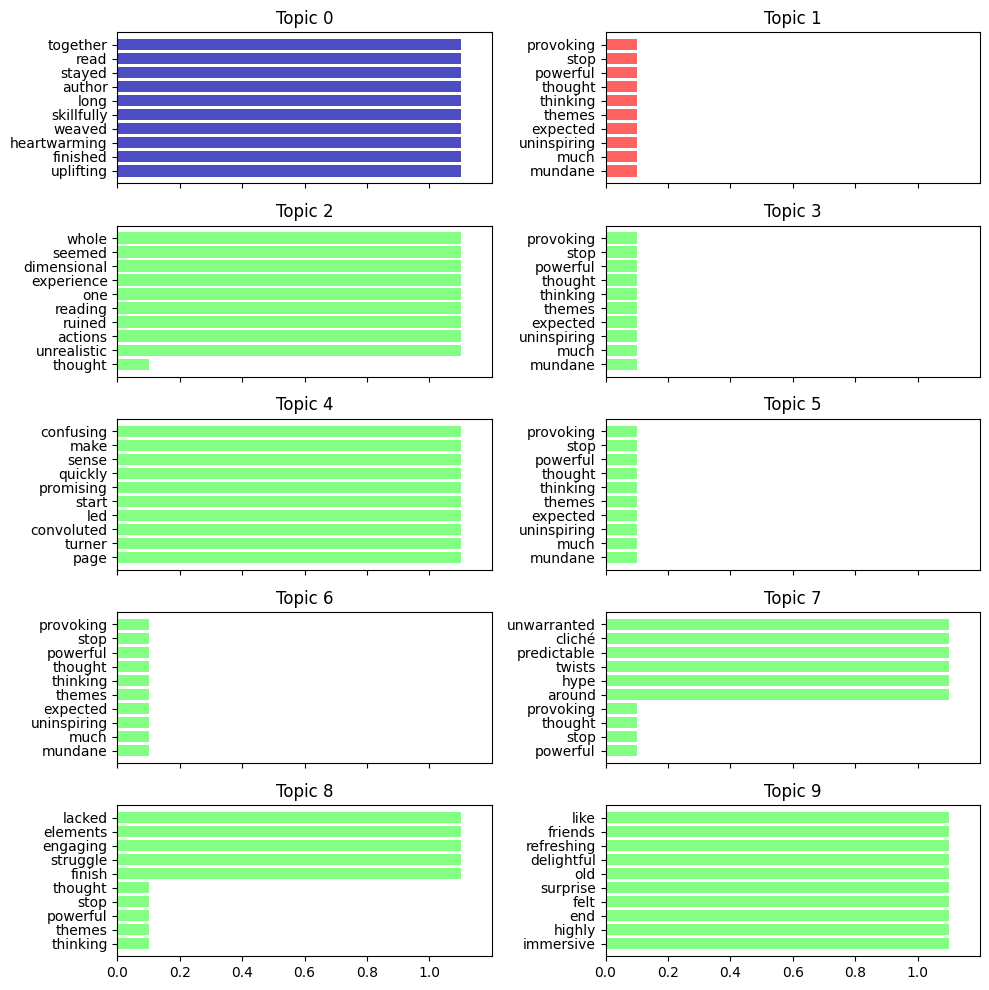

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 2, figsize=(10, 10), sharex=True)
ax = np.array(ax).flatten()


top_words_indices = sorting[:, :10]
colors = mglearn.cm3(np.arange(10))

for topic_idx, ax in enumerate(ax):
    ax.barh(range(10), lda.components_[topic_idx, top_words_indices[topic_idx]], color=colors[topic_idx], alpha=0.7)
    ax.set_yticks(range(10))
    ax.set_yticklabels(feature_names[top_words_indices[topic_idx]])
    ax.invert_yaxis()
    ax.set_xlim(0, lda.components_[topic_idx, top_words_indices[topic_idx]].max() + 0.1)
    ax.set_title(f'Topic {topic_idx}')

plt.tight_layout()
plt.show()